# Conduct complete data analytics and predictive modelling  to predict crime types by day type and district

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.feature_selection import SelectKBest,chi2, RFE
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
dataframe = pd.read_csv("C:/Datasets/crime_data_Proj1.csv")

In [2]:
dataframe.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


# Data Pruning

In [3]:
dataframe.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [4]:
#removing suboptimal features from a dataset to improve the learning of a machine model.
dataframe.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
dataframeSub = dataframe[['ID', 'Date', 'Block',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'District',  'Year', 'Updated On']]

#District location was used because
#     1. THE MISSING VALUES IN DISTRICT IS LESSER COMPARED TO OTHER LOCATION TYPE
#     2. IN BUILDING MODELS, WE START WITH A COARSE POINT OF VIEW.HIGH ACCURACY IS MORE IMPORTANT THAN HIGH RESOLUTION.
# UPDATED ON is kept to know how long it takes a crime to be updated on to know how heavily burdened the police are. 

# FEATURE ENGINEERING

In [6]:
# involves creating new features using an existiing feature
# we need to add new features:
# 1. it assist the police on knowing when the crime actually occured i.e wat time of the day.
# 2. to analyse if the crime is seasonal
# 3. to analyse if the crime occured because of the time or day in question
# 4. to enable the police plan and mobilize resources in/on those specific day.
from dateutil.parser import parse
from datetime import datetime


timeCol =dataframeSub.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in timeCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

dataframeSub['month'] = monthList
dataframeSub['day'] = dayList
dataframeSub['period']= periodList
dataframeSub.head()

2278726 2278726 2278726


C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/38839380.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeSub['month'] = monthList
C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/38839380.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeSub['day'] = dayList
C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/38839380.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period
0,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon
1,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning
2,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning
3,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning
4,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning


In [7]:
dataframeSub.day.unique()

array(['Sat ', 'Tue ', 'Fri ', 'Mon ', 'Sun ', 'Wed ', 'Thu '],
      dtype=object)

In [8]:
wkList = []
for day in list(dataframeSub.day):
    if day in ['Sat ', 'Sun ']:
        wkList.append('Weekend')
    else:
        wkList.append('Weekday')
dataframeSub['dayType'] = wkList  

C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/2932693538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeSub['dayType'] = wkList


In [9]:
dataframeSub.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType
0,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon,Weekend
1,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning,Weekday
2,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning,Weekday
3,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning,Weekday
4,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning,Weekend


# Data Cleaning

In [10]:
dataframeSub.isna().sum()

ID                         0
Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    2877
Arrest                     0
Domestic                   0
District                  12
Year                       0
Updated On                 0
month                      0
day                        0
period                     0
dayType                    0
dtype: int64

In [11]:
#treating missing value
dataframeFinal= dataframeSub.dropna()
# This method is use because, The dataset sample is large and we can affored to drop 0.1% of the samples.
# we cannot use the othe method of treating missing values as it would be irrelevant
dataframeFinal.isna().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Year                    0
Updated On              0
month                   0
day                     0
period                  0
dayType                 0
dtype: int64

In [12]:
dataframeFinal.nunique() # This was done to know if i want to drop ID

ID                      2275837
Date                    1342009
Block                     54119
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
District                     23
Year                         22
Updated On                 4442
month                        12
day                           7
period                        4
dayType                       2
dtype: int64

In [13]:
dataframeFinal_ = dataframeFinal.drop(['ID','Date','Updated On'], axis=1)

In [14]:
#removing Duplicate
dupDataset = dataframeFinal_.duplicated(keep='first')
cleanDataset = dataframeFinal_[~dupDataset]
cleanDataset

,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,month,day,period,dayType
0,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,Jul,Sat,Afternoon,Weekend
1,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,Jul,Tue,Morning,Weekday
2,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,Apr,Fri,Morning,Weekday
3,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,Jul,Mon,Morning,Weekday
4,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,Jul,Sun,Morning,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,Oct,Fri,Afternoon,Weekday
2278722,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,Sep,Tue,Night,Weekday
2278723,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,May,Wed,Night,Weekday
2278724,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,Oct,Wed,Night,Weekday


# DATA Visualization

[Text(0, 0, '8.0'),
 Text(1, 0, '11.0'),
 Text(2, 0, '6.0'),
 Text(3, 0, '7.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '25.0'),
 Text(6, 0, '3.0'),
 Text(7, 0, '12.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '2.0'),
 Text(10, 0, '19.0'),
 Text(11, 0, '5.0'),
 Text(12, 0, '18.0'),
 Text(13, 0, '15.0'),
 Text(14, 0, '10.0'),
 Text(15, 0, '1.0'),
 Text(16, 0, '14.0'),
 Text(17, 0, '16.0'),
 Text(18, 0, '22.0'),
 Text(19, 0, '24.0'),
 Text(20, 0, '17.0'),
 Text(21, 0, '20.0'),
 Text(22, 0, '31.0')]

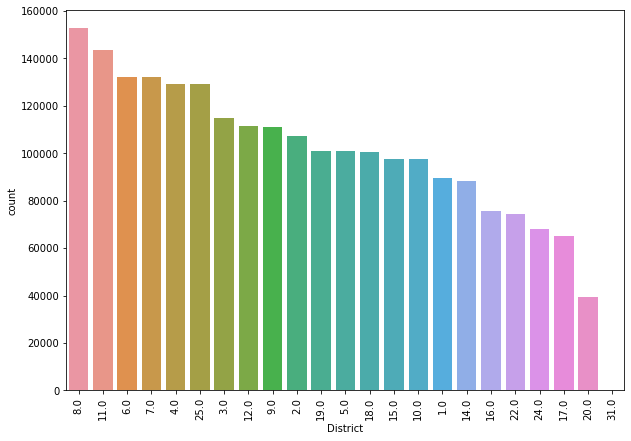

In [15]:
#Print and Visualize value count for 'District' feature labels
plt.figure(figsize=(10,7))
ax = sns.countplot(x = cleanDataset['District'],orient='p',order = cleanDataset['District'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [16]:
uniquecleanDataset=cleanDataset['Primary Type'].unique()
uniquecleanDataset.sort()
uniquecleanDataset

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


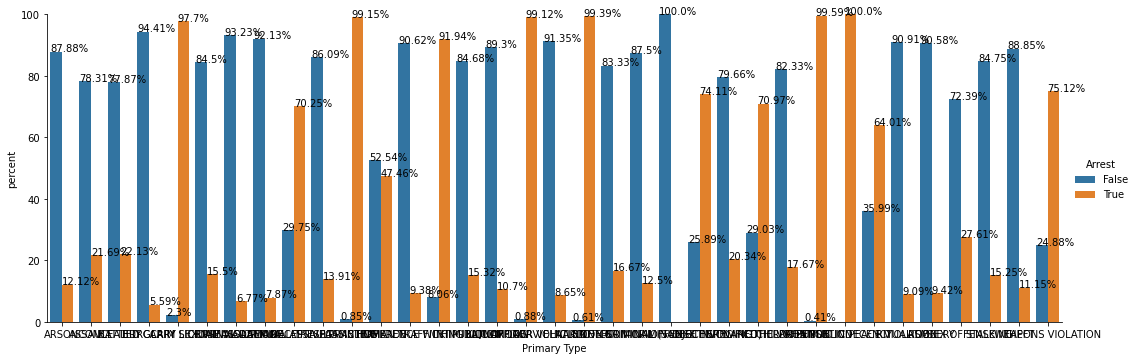

In [17]:
#sns.stripplot(cleanDataset['Arrest'], cleanDataset['Primary Type'])
#ax4=sns.countplot(cleanDataset['Primary Type'],hue='Arrest', data=cleanDataset)

#plt.title('Primary Type  w.r.t. Arrest.', fontsize = 30)
x,y = 'Primary Type', 'Arrest'
df1 = cleanDataset.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height= 5,aspect=3)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Label Encoding

In [18]:
cleanDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260826 entries, 0 to 2278725
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   District              float64
 7   Year                  int64  
 8   month                 object 
 9   day                   object 
 10  period                object 
 11  dayType               object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 194.0+ MB


In [19]:
#dataEncode = cleanDataset
for column in cleanDataset.columns:
    if cleanDataset[column].dtype == np.number:
        continue 
    cleanDataset[column] = LabelEncoder().fit_transform(cleanDataset[column])  
cleanDataset

C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/661400019.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDataset[column].dtype == np.number:
C:\Users\APINPC\AppData\Local\Temp/ipykernel_13400/661400019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDataset[column] = LabelEncoder().fit_transform(cleanDataset[column])


,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,month,day,period,dayType
0,48486,6,463,171,0,0,4.0,7,5,2,0,1
1,49688,34,469,139,1,0,4.0,17,5,5,2,0
2,41020,3,216,145,1,0,17.0,6,0,0,2,0
3,366,1,422,125,0,0,11.0,17,5,1,2,0
4,13363,1,25,134,0,0,12.0,20,5,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,5240,1,422,60,1,0,18.0,15,10,0,0,0
2278722,35978,2,422,145,0,1,15.0,0,11,5,3,0
2278723,5955,1,422,17,0,1,2.0,5,8,6,3,0
2278724,2576,8,463,135,0,0,18.0,16,10,6,3,0


In [20]:
cleanDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260826 entries, 0 to 2278725
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 int32  
 1   Primary Type          int32  
 2   Description           int32  
 3   Location Description  int32  
 4   Arrest                int64  
 5   Domestic              int64  
 6   District              float64
 7   Year                  int64  
 8   month                 int32  
 9   day                   int32  
 10  period                int32  
 11  dayType               int32  
dtypes: float64(1), int32(8), int64(3)
memory usage: 155.2 MB


In [21]:
#removing outliers
def Outliers(data,feature):
    IQ1 = data[feature].quantile(0.25) # identify 25%
    IQ3 = data[feature].quantile(0.75) # identify 75% 
    IQR = IQ3 - IQ1 # identify the range
    
    lowerBound = IQ1 - 1.5 * IQR
    upperBound = IQ3 + 1.5 * IQR
    
    index = data. index[ (data[feature] < lowerBound) | (data[feature] > upperBound) ]
    
    return index

In [22]:
#getting index of all the outliers
index = []
for i in cleanDataset.columns: # goes through all colums in the dataset
    index.extend(Outliers(cleanDataset, i))# this passes dataset and the column of interest
index = set(index)
print('Total number of outliers are {}'.format(len(index)))

#Dropping all the outliers
cleanDataset. drop(index, inplace = True, axis = 0)
cleanDataset.shape
#dataEncode.head(10) #- to select top 10 samples

Total number of outliers are 313051


C:\Users\APINPC\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1947775, 12)

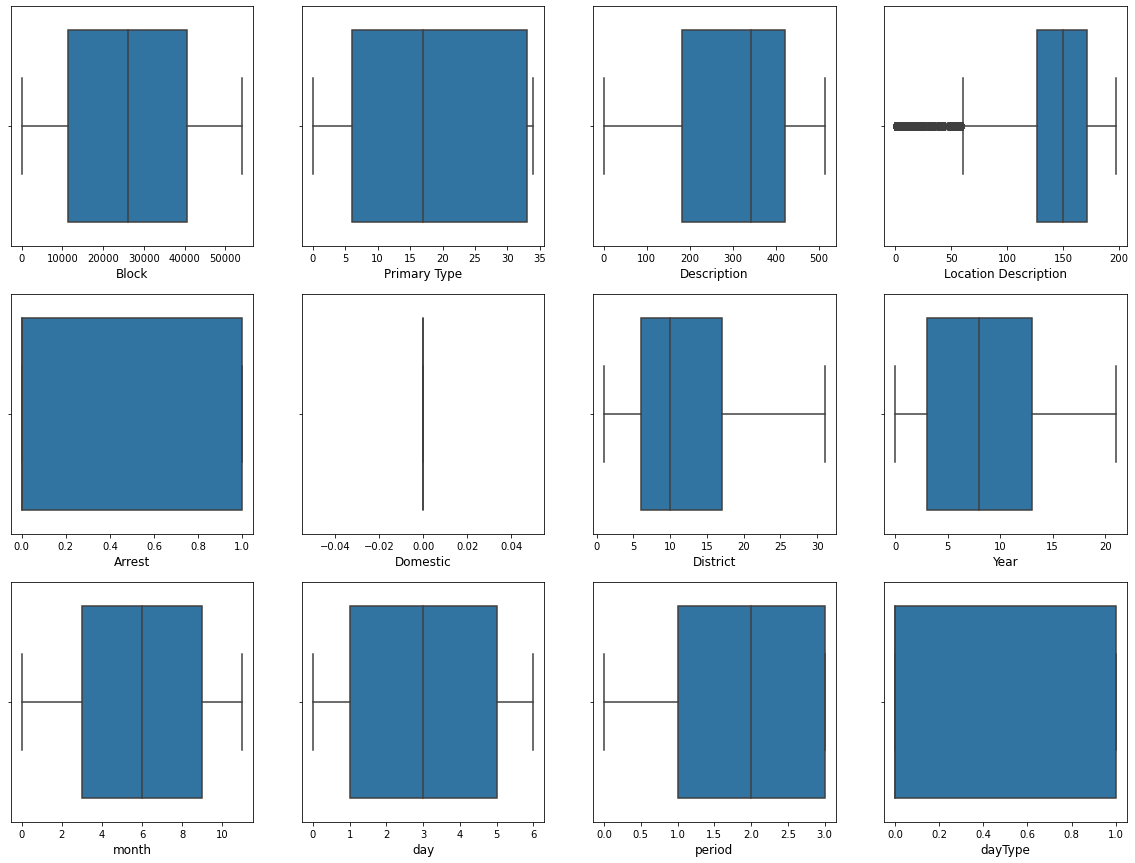

In [23]:
# checking for outliers based on cleanDataset 
plt.figure(figsize=(20, 15))
for i in range(len(cleanDataset.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x =cleanDataset.iloc[:, i])
    plt.xlabel(cleanDataset.columns[i], size =12)

<AxesSubplot:>

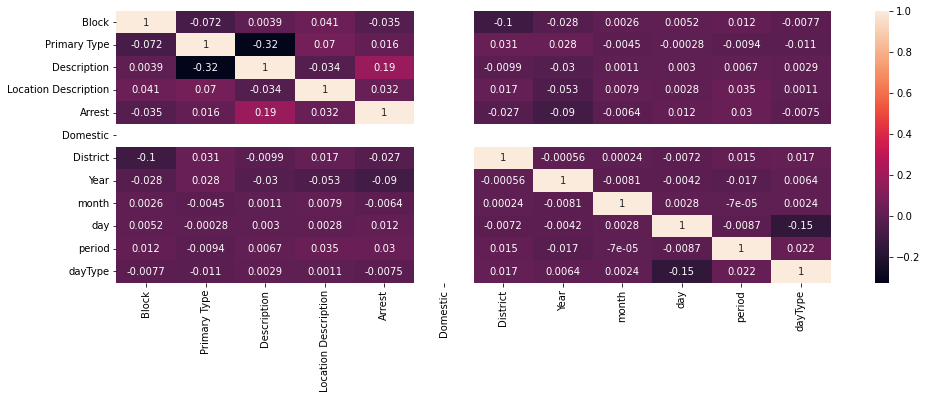

In [24]:
# correlation between attributes

pd.set_option('display.width', 100)

plt.figure(figsize=(16,5))

#sns. heatmap(data.corr())

sns.heatmap(cleanDataset.corr(), annot= True)

In [25]:
# from the above Heat map, it can be seen that feature 'Domestic' has only one unique label
cleanDatasetFinal = cleanDataset.drop(['Domestic'], axis=1)
cleanDatasetFinal

,Block,Primary Type,Description,Location Description,Arrest,District,Year,month,day,period,dayType
0,48486,6,463,171,0,4.0,7,5,2,0,1
1,49688,34,469,139,1,4.0,17,5,5,2,0
2,41020,3,216,145,1,17.0,6,0,0,2,0
3,366,1,422,125,0,11.0,17,5,1,2,0
4,13363,1,25,134,0,12.0,20,5,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2278719,49145,6,458,151,0,4.0,9,9,3,2,1
2278720,38205,33,335,190,0,16.0,7,2,6,2,0
2278721,5240,1,422,60,1,18.0,15,10,0,0,0
2278724,2576,8,463,135,0,18.0,16,10,6,3,0


# Feature Transformation

In [26]:
cleanDatasetFinal.describe()

,Block,Primary Type,Description,Location Description,Arrest,District,Year,month,day,period,dayType
count,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06
mean,2.601456e+04,1.662739e+01,2.929692e+02,1.312785e+02,2.741174e-01,1.141178e+01,8.486227e+00,5.572430e+00,2.990088e+00,1.966550e+00,2.717834e-01
std,1.596867e+04,1.245370e+01,1.546897e+02,5.323439e+01,4.460685e-01,6.968358e+00,5.962255e+00,3.452764e+00,2.027268e+00,1.050652e+00,4.448790e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.135100e+04,6.000000e+00,1.810000e+02,1.270000e+02,0.000000e+00,6.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.617100e+04,1.700000e+01,3.430000e+02,1.500000e+02,0.000000e+00,1.000000e+01,8.000000e+00,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
75%,4.050000e+04,3.300000e+01,4.220000e+02,1.710000e+02,1.000000e+00,1.700000e+01,1.300000e+01,9.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00
max,5.411800e+04,3.400000e+01,5.140000e+02,1.970000e+02,1.000000e+00,3.100000e+01,2.100000e+01,1.100000e+01,6.000000e+00,3.000000e+00,1.000000e+00


In [27]:
'''plt.figure(figsize=(20, 15))
for i in range(len(cleanDatasetFinal.columns)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x =cleanDatasetFinal.iloc[:, i])
    plt.xlabel(cleanDatasetFinal.columns[i], size =11)'''

'plt.figure(figsize=(20, 15))\nfor i in range(len(cleanDatasetFinal.columns)):\n    plt.subplot(3,4,i+1)\n    sns.kdeplot(x =cleanDatasetFinal.iloc[:, i])\n    plt.xlabel(cleanDatasetFinal.columns[i], size =11)'

In [28]:
#using primary Type as the feature in understanding normal disdistribution
# rule 1: what is the arithmetic centre point between the max and min of Primary Type feature = 34
#         what is the 50% 0f Primary Type features= 17
# rule 2:what is the mean of Primary Type feature=16.6
#        what is the 50% of Primary Type features= 17
# is the logic centre point identical 50%? NO.
# is the mean identical 50%? YES.
#Is the data normal? NO
#why?
#because rule 1 was not met. for a data to be normalized both rules must me met.

# Rearranging the features where District = Outcome variable

In [29]:

rearrangeDF = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','dayType','period','District']
newDataframe = cleanDatasetFinal[rearrangeDF]


In [30]:
#seperate Outcome variabele from input variable
array = newDataframe.values
X_arr = array[:,0:10]
Y = array[:,10]
demo= MinMaxScaler(feature_range=(0,1))
rescaledX= demo.fit_transform(X=X_arr)
rescaledXdf = pd.DataFrame(rescaledX)
rescaledXdf.columns = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','dayType','period']
rescaledXdf['District'] = Y
rescaledXdf

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,dayType,period,District
0,0.895931,0.900778,0.868020,0.0,0.176471,0.333333,0.454545,0.333333,1.0,0.000000,4.0
1,0.918142,0.912451,0.705584,1.0,1.000000,0.809524,0.454545,0.833333,0.0,0.666667,4.0
2,0.757973,0.420233,0.736041,1.0,0.088235,0.285714,0.000000,0.000000,0.0,0.666667,17.0
3,0.006763,0.821012,0.634518,0.0,0.029412,0.809524,0.454545,0.166667,0.0,0.666667,11.0
4,0.246923,0.048638,0.680203,0.0,0.029412,0.952381,0.454545,0.500000,1.0,0.666667,12.0
...,...,...,...,...,...,...,...,...,...,...,...
1947770,0.908108,0.891051,0.766497,0.0,0.176471,0.428571,0.818182,0.500000,1.0,0.666667,4.0
1947771,0.705957,0.651751,0.964467,0.0,0.970588,0.333333,0.181818,1.000000,0.0,0.666667,16.0
1947772,0.096825,0.821012,0.304569,1.0,0.029412,0.714286,0.909091,0.000000,0.0,0.000000,18.0
1947773,0.047600,0.900778,0.685279,0.0,0.235294,0.761905,0.909091,1.000000,0.0,1.000000,18.0


In [31]:
#normalize
array = rescaledXdf.values
# seperate array into input and output outcomes
 
X = array[0:, 0:10]
Y = array[:,10]
scaler = Normalizer().fit(X)
normalizedX= scaler.transform(X)
normDF =pd.DataFrame(normalizedX, columns = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','dayType','period'])
normDF['District'] = Y
normDF

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,dayType,period,District
0,0.457947,0.460425,0.443681,0.000000,0.090201,0.170380,0.232337,0.170380,0.511141,0.000000,4.0
1,0.369503,0.367213,0.283960,0.402447,0.402447,0.325790,0.182930,0.335372,0.000000,0.268298,4.0
2,0.450828,0.249947,0.437783,0.594781,0.052481,0.169937,0.000000,0.000000,0.000000,0.396521,17.0
3,0.004355,0.528669,0.408581,0.000000,0.018939,0.521271,0.292692,0.107321,0.000000,0.429282,11.0
4,0.135212,0.026634,0.372471,0.000000,0.016106,0.521513,0.248904,0.273794,0.547589,0.365059,12.0
...,...,...,...,...,...,...,...,...,...,...,...
1947770,0.415149,0.407351,0.350411,0.000000,0.080675,0.195925,0.374039,0.228579,0.457158,0.304772,4.0
1947771,0.337165,0.311276,0.460630,0.000000,0.463553,0.159200,0.086836,0.477600,0.000000,0.318400,16.0
1947772,0.054872,0.465275,0.172602,0.566710,0.016668,0.404793,0.515191,0.000000,0.000000,0.000000,18.0
1947773,0.021850,0.413498,0.314574,0.000000,0.108011,0.349749,0.417314,0.459045,0.000000,0.459045,18.0


In [32]:
normDF.describe()

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,dayType,period,District
count,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06
mean,2.532900e-01,3.020629e-01,3.519299e-01,1.325867e-01,2.549271e-01,2.136655e-01,2.653411e-01,2.603562e-01,1.346523e-01,3.422483e-01,1.141178e+01
std,1.544950e-01,1.615366e-01,1.466537e-01,2.177239e-01,1.919059e-01,1.499155e-01,1.618020e-01,1.796855e-01,2.224782e-01,1.814709e-01,6.968358e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.149130e-01,1.985566e-01,3.105211e-01,0.000000e+00,7.878725e-02,8.704572e-02,1.289166e-01,1.039517e-01,0.000000e+00,2.393201e-01,6.000000e+00
50%,2.566207e-01,3.249101e-01,3.919868e-01,0.000000e+00,2.401684e-01,1.938734e-01,2.730109e-01,2.423671e-01,0.000000e+00,3.791278e-01,1.000000e+01
75%,3.796468e-01,4.241487e-01,4.436645e-01,4.185983e-01,4.401685e-01,3.267791e-01,3.963714e-01,4.178506e-01,4.243487e-01,4.741719e-01,1.700000e+01
max,9.567469e-01,9.856140e-01,9.879573e-01,9.588544e-01,9.650481e-01,9.899714e-01,9.726977e-01,9.694286e-01,9.243294e-01,9.844980e-01,3.100000e+01


since our Standard deviation across all features is not more than one there is no need to standardize

# Feature Selection

In [33]:
# UNIVARIATE FEATURE SELECTION

normArray=normDF.values
# seperate the array

X = normArray[:,0:10]

Y = normArray[:,10]
#feature Extraction
test1 = SelectKBest(score_func=chi2, k=5)
test = test1.fit(X, Y) # check relationship of input variabele with the output variable and score
#set_printoptions(precision=3)
inVar = normDF.drop(['District'],axis=1)
arr= inVar.columns
scores = test.scores_
ScoresDF= pd.DataFrame(arr,scores)
ScoresDF
#print(test.scores_)



,0
67952.471227,Block
207.560884,Description
1372.979781,Location Description
16793.160767,Arrest
7215.812477,Primary Type
1155.460671,Year
273.188918,month
188.502880,day
1316.271309,dayType
495.846489,period


In [34]:
# based on the above test score
Features = test.transform(X)
selectedFeatures =pd.DataFrame(Features)
selectedFeatures.columns =['Block', 'Arrest', 'Primary Type', 'Location Description', 'dayType']
selectedFeatures['District']= Y
selectedFeatures

,Block,Arrest,Primary Type,Location Description,dayType,District
0,0.457947,0.443681,0.000000,0.090201,0.511141,4.0
1,0.369503,0.283960,0.402447,0.402447,0.000000,4.0
2,0.450828,0.437783,0.594781,0.052481,0.000000,17.0
3,0.004355,0.408581,0.000000,0.018939,0.000000,11.0
4,0.135212,0.372471,0.000000,0.016106,0.547589,12.0
...,...,...,...,...,...,...
1947770,0.415149,0.350411,0.000000,0.080675,0.457158,4.0
1947771,0.337165,0.460630,0.000000,0.463553,0.000000,16.0
1947772,0.054872,0.172602,0.566710,0.016668,0.000000,18.0
1947773,0.021850,0.314574,0.000000,0.108011,0.000000,18.0


In [35]:
# Recursive Elimination Technique
array=normDF.values
X = array[:, 0:10]
Y = array[:, 10]
model = LinearDiscriminantAnalysis()
rfe=RFE(model,n_features_to_select=5)
fit = rfe.fit(X, Y)
#Features = fit.transform(X)
#rfeSelectedDF =pd.DataFrame(Features)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_)) 


Num Features: 5
Selected Features: [ True False  True  True False  True False False False  True]
Feature Ranking: [1 5 1 1 6 1 3 2 4 1]


In [36]:
Features = fit.transform(X)
rfeSelectedDF =pd.DataFrame(Features)
rfeSelectedDF.columns = ['Block', 'Location Description', 'Arrest', 'Year', 'period']
rfeSelectedDF['District']= Y
rfeSelectedDF

,Block,Location Description,Arrest,Year,period,District
0,0.457947,0.443681,0.000000,0.170380,0.000000,4.0
1,0.369503,0.283960,0.402447,0.325790,0.268298,4.0
2,0.450828,0.437783,0.594781,0.169937,0.396521,17.0
3,0.004355,0.408581,0.000000,0.521271,0.429282,11.0
4,0.135212,0.372471,0.000000,0.521513,0.365059,12.0
...,...,...,...,...,...,...
1947770,0.415149,0.350411,0.000000,0.195925,0.304772,4.0
1947771,0.337165,0.460630,0.000000,0.159200,0.318400,16.0
1947772,0.054872,0.172602,0.566710,0.404793,0.000000,18.0
1947773,0.021850,0.314574,0.000000,0.349749,0.459045,18.0


In [37]:
#checking for the best technique for feature selection
dfUnivar = selectedFeatures

dfRfe = rfeSelectedDF

In [38]:
#Univariate Model 
array = dfUnivar.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=num_folds) # shuffle = True, random_state=10

model = GaussianNB()

results = cross_val_score(model, X, Y, cv=kfold)
accuracy = np.mean(results)
Y_predict = cross_val_predict(model, X, Y, cv=kfold)
MAE = mae(Y,Y_predict)
print('model accuracy is: ',accuracy)
print('model mean absolute error is: ',MAE)


model accuracy is:  0.15775384597033995
model mean absolute error is:  6.120441529437435


In [39]:
#Recursive Elimination Model 
array = dfRfe.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=num_folds) # shuffle = True, random_state=10

model =GaussianNB()

results = cross_val_score(model, X, Y, cv=kfold)
accuracy = np.mean(results)
Y_predict = cross_val_predict(model, X, Y, cv=kfold)
MAE = mae(Y,Y_predict)
print('model accuracy is: ',accuracy)
print('model mean absolute error is: ',MAE)


model accuracy is:  0.15403011019849672
model mean absolute error is:  6.198671817843437


from the above feature selection technique, it is seen that Univariate technique has an higher accuracy and lesser error when compared to recursive features elimination technique

# Model Building

our outcome variable is District with more than one possible outcome , therefore we will be using CLASSIFICATION MODEL

In [40]:
array = dfUnivar.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)

models = []

#models.append(('SVC', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))

models.append(('LD', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVC', SVC()))
#models.append(('RFC',RandomForestClassifier(random_state=1)))

# evaluate each model in turn
              
Results = []
Predicts = []
names = []

for name, model in models:
    results = cross_val_score(model, X, Y, cv=kfold)
    resultsMean = results.mean()
    Y_predict = cross_val_predict(model, X, Y, cv=kfold)
    Results.append(resultsMean)
    MAE = mae(Y,Y_predict)
    Predicts.append(MAE)
    names.append(name)
    msg = (name, resultsMean,MAE)
    print(msg)

('LD', 0.14973957457136228, 6.372245254200306)
('GNB', 0.15775384597033995, 6.120441529437435)
('DTC', 0.29895547302253467, 5.676719847004916)


Based on th above outcome, it shows that of all the 3 algorithms used,  The algorithm with the highest accuracy and lesser error is the Decision Tree Classifier

# Rearranging the features where day type = Outcome variable

In [41]:
rearrangeDT = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','period','District','dayType']
newDataframeDT = cleanDatasetFinal[rearrangeDT]

In [42]:
#seperate Outcome variabele from input variable
array = newDataframeDT.values
X_arr = array[:,0:10]
Y = array[:,10]
demo= MinMaxScaler(feature_range=(0,1))
rescaledX= demo.fit_transform(X=X_arr)
rescaledXdf = pd.DataFrame(rescaledX)
rescaledXdf.columns = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','period','District']
rescaledXdf['dayType'] = Y
rescaledXdf

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,period,District,dayType
0,0.895931,0.900778,0.868020,0.0,0.176471,0.333333,0.454545,0.333333,0.000000,0.100000,1.0
1,0.918142,0.912451,0.705584,1.0,1.000000,0.809524,0.454545,0.833333,0.666667,0.100000,0.0
2,0.757973,0.420233,0.736041,1.0,0.088235,0.285714,0.000000,0.000000,0.666667,0.533333,0.0
3,0.006763,0.821012,0.634518,0.0,0.029412,0.809524,0.454545,0.166667,0.666667,0.333333,0.0
4,0.246923,0.048638,0.680203,0.0,0.029412,0.952381,0.454545,0.500000,0.666667,0.366667,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1947770,0.908108,0.891051,0.766497,0.0,0.176471,0.428571,0.818182,0.500000,0.666667,0.100000,1.0
1947771,0.705957,0.651751,0.964467,0.0,0.970588,0.333333,0.181818,1.000000,0.666667,0.500000,0.0
1947772,0.096825,0.821012,0.304569,1.0,0.029412,0.714286,0.909091,0.000000,0.000000,0.566667,0.0
1947773,0.047600,0.900778,0.685279,0.0,0.235294,0.761905,0.909091,1.000000,1.000000,0.566667,0.0


In [43]:
#normalize
array = rescaledXdf.values
# seperate array into input and output outcomes
 
X = array[0:, 0:10]
Y = array[:,10]
scaler = Normalizer().fit(X)
normalizedX= scaler.transform(X)
normDF =pd.DataFrame(normalizedX, columns = ['Block','Description','Location Description','Arrest','Primary Type','Year','month','day','dayType','period'])
normDF['District'] = Y
normDF

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,dayType,period,District
0,0.531869,0.534746,0.515300,0.000000,0.104762,0.197883,0.269841,0.197883,0.000000,0.059365,1.0
1,0.369204,0.366916,0.283730,0.402121,0.402121,0.325527,0.182782,0.335101,0.268081,0.040212,0.0
2,0.429726,0.238247,0.417291,0.566940,0.050024,0.161983,0.000000,0.000000,0.377960,0.302368,0.0
3,0.004258,0.516896,0.399482,0.000000,0.018517,0.509663,0.286175,0.104931,0.419723,0.209861,0.0
4,0.157132,0.030951,0.432855,0.000000,0.018717,0.606058,0.289255,0.318181,0.424241,0.233332,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1947770,0.466167,0.457410,0.393473,0.000000,0.090589,0.220002,0.420004,0.256669,0.342226,0.051334,1.0
1947771,0.327944,0.302763,0.448032,0.000000,0.450876,0.154846,0.084462,0.464538,0.309692,0.232269,0.0
1947772,0.052244,0.442993,0.164336,0.539570,0.015870,0.385407,0.490518,0.000000,0.000000,0.305756,0.0
1947773,0.021147,0.400180,0.304442,0.000000,0.104532,0.338484,0.403873,0.444260,0.444260,0.251748,0.0


In [44]:
normDF.describe()

,Block,Description,Location Description,Arrest,Primary Type,Year,month,day,dayType,period,District
count,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06,1.947775e+06
mean,2.564060e-01,3.055512e-01,3.559377e-01,1.340190e-01,2.574711e-01,2.161390e-01,2.683599e-01,2.625393e-01,3.463622e-01,1.867216e-01,2.717834e-01
std,1.568294e-01,1.628948e-01,1.474416e-01,2.199461e-01,1.931899e-01,1.511654e-01,1.630496e-01,1.742279e-01,1.827352e-01,1.253283e-01,4.448790e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.156137e-01,2.011779e-01,3.145633e-01,0.000000e+00,8.005222e-02,8.819396e-02,1.304852e-01,1.007494e-01,2.399083e-01,8.303087e-02,0.000000e+00
50%,2.591300e-01,3.284427e-01,3.975631e-01,0.000000e+00,2.438203e-01,1.962712e-01,2.768341e-01,2.704601e-01,3.858191e-01,1.676892e-01,0.000000e+00
75%,3.849197e-01,4.306124e-01,4.494517e-01,4.238739e-01,4.454428e-01,3.309637e-01,4.011381e-01,4.091480e-01,4.799274e-01,2.833159e-01,1.000000e+00
max,9.386947e-01,9.856140e-01,9.749167e-01,9.512001e-01,9.650481e-01,9.670858e-01,9.521121e-01,9.612789e-01,9.701129e-01,8.548429e-01,1.000000e+00


From below , the different between the standard deviation for each feature is infinitesimal i.e. the Standard deviation of each features is not more than one therefore standardization is not necessary.


# Feature Selection

In [45]:
# UNIVARIATE FEATURE SELECTION

normArray=normDF.values
# seperate the array

X = normArray[:,0:10]

Y = normArray[:,10]
#feature Extraction
test1 = SelectKBest(score_func=chi2, k=5)
test = test1.fit(X, Y) # check relationship of input variabele with the output variable and score
inVar = normDF.drop(['dayType'],axis=1)
arr= inVar.columns
scores = test.scores_
ScoresDF= pd.DataFrame(arr,scores)
ScoresDF

,0
45.498985,Block
138.652364,Description
145.896211,Location Description
0.113072,Arrest
14.116451,Primary Type
137.730057,Year
122.750815,month
2788.662797,day
496.475184,period
250.374308,District


In [46]:
# based on the above test score
Features = test.transform(X)
selectedFeatures =pd.DataFrame(Features)
selectedFeatures.columns =['day', 'period', 'District', 'Location Description', 'Description']
selectedFeatures['dayType']= Y
selectedFeatures

,day,period,District,Location Description,Description,dayType
0,0.534746,0.515300,0.197883,0.000000,0.059365,1.0
1,0.366916,0.283730,0.335101,0.268081,0.040212,0.0
2,0.238247,0.417291,0.000000,0.377960,0.302368,0.0
3,0.516896,0.399482,0.104931,0.419723,0.209861,0.0
4,0.030951,0.432855,0.318181,0.424241,0.233332,1.0
...,...,...,...,...,...,...
1947770,0.457410,0.393473,0.256669,0.342226,0.051334,1.0
1947771,0.302763,0.448032,0.464538,0.309692,0.232269,0.0
1947772,0.442993,0.164336,0.000000,0.000000,0.305756,0.0
1947773,0.400180,0.304442,0.444260,0.444260,0.251748,0.0


In [47]:
# Recursive Elimination Technique
array=normDF.values
X = array[:, 0:10]
Y = array[:, 10]
model = LinearDiscriminantAnalysis()
rfe=RFE(model,n_features_to_select=5)
fit = rfe.fit(X, Y)
#Features = fit.transform(X)
#rfeSelectedDF =pd.DataFrame(Features)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_)) 

Num Features: 5
Selected Features: [False  True  True False False  True False False  True  True]
Feature Ranking: [4 1 1 5 3 1 2 6 1 1]


In [48]:
Features = fit.transform(X)
rfeSelectedDF =pd.DataFrame(Features)
rfeSelectedDF.columns = ['Description', 'Location Description', 'Year', 'period', 'District']
rfeSelectedDF['dayType']= Y
rfeSelectedDF

,Description,Location Description,Year,period,District,dayType
0,0.534746,0.515300,0.197883,0.000000,0.059365,1.0
1,0.366916,0.283730,0.325527,0.268081,0.040212,0.0
2,0.238247,0.417291,0.161983,0.377960,0.302368,0.0
3,0.516896,0.399482,0.509663,0.419723,0.209861,0.0
4,0.030951,0.432855,0.606058,0.424241,0.233332,1.0
...,...,...,...,...,...,...
1947770,0.457410,0.393473,0.220002,0.342226,0.051334,1.0
1947771,0.302763,0.448032,0.154846,0.309692,0.232269,0.0
1947772,0.442993,0.164336,0.385407,0.000000,0.305756,0.0
1947773,0.400180,0.304442,0.338484,0.444260,0.251748,0.0


In [49]:
#checking for the best technique for feature selection
dfUnivar = selectedFeatures

dfRfe = rfeSelectedDF

In [50]:
#Univariate Model 
array = dfUnivar.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=num_folds) # shuffle = True, random_state=10

model = GaussianNB()

results = cross_val_score(model, X, Y, cv=kfold)
accuracy = np.mean(results)
Y_predict = cross_val_predict(model, X, Y, cv=kfold)
MAE = mae(Y,Y_predict)
print('model accuracy is: ',accuracy)
print('model mean absolute error is: ',MAE)


model accuracy is:  0.8670339238464259
model mean absolute error is:  0.13296607667723429


In [51]:
#Recursive Elimination Model 
array = dfRfe.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=num_folds) # shuffle = True, random_state=10

model =GaussianNB()

results = cross_val_score(model, X, Y, cv=kfold)
accuracy = np.mean(results)
Y_predict = cross_val_predict(model, X, Y, cv=kfold)
MAE = mae(Y,Y_predict)
print('model accuracy is: ',accuracy)
print('model mean absolute error is: ',MAE)

model accuracy is:  0.7282165545860738
model mean absolute error is:  0.2717834452131278


from the above feature selection technique, it is seen that Univariate technique has an higher accuracy and lesser error when compared to recursive features elimination technique

# Model Building

In [52]:
array = dfUnivar.values
X = array[:, 0:5]
Y =  array[:,5] # outcome variable
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)

models = []

models.append(('LD', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))

# evaluate each model in turn
              
Results = []
Predicts = []
names = []

for name, model in models:
    results = cross_val_score(model, X, Y, cv=kfold)
    resultsMean = results.mean()
    Y_predict = cross_val_predict(model, X, Y, cv=kfold)
    Results.append(resultsMean)
    MAE = mae(Y,Y_predict)
    Predicts.append(MAE)
    names.append(name)
    msg = (name, resultsMean,MAE)
    print(msg)

('LD', 0.7282165545860738, 0.2717834452131278)
('GNB', 0.8670339238464259, 0.13296607667723429)
('DTC', 0.9970053007818784, 0.002996239298686963)
('LR', 0.7282165545860738, 0.2717834452131278)


As shown above, Decision Tree Classifier is the best algorithm to use when compared to the other algorithm